##### Исследование самых активных граждан Москвы
###### (тех, кто участвует в голосованиях про метро)
![Метро](https://wensa.ru/upload/iblock/266/266c37721c417f5a336ed8a36dc31e45.jpg)

###### Импорт библиотек

In [119]:
import textwrap
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

###### Подключение к базе данных

In [2]:
conn = sqlite3.connect('hackathon.db')
cur = conn.cursor()

###### Перевод данных из табличного формата в БД

In [ ]:
tables = ['music.xlsx', 'obyavlenia.xlsx', 'stations.xlsx', 'torgovla.xlsx', 'wifi.xlsx']
for sheet in tables:
    dfs = pd.read_excel(sheet, sheet_name=None)
    for table, df in dfs.items():
        df.to_sql(table, conn)

###### Метод построения графика

In [73]:
def buildPlot(lst):
    amount, word = zip(*lst)
    index = np.arange(len(lst))
    plt.bar(index, word, 0.5, alpha=0.5, color='b')
    plt.xticks(index, [textwrap.fill(label, 11) for label in amount],
               rotation=10, fontsize=8, horizontalalignment="center")
    plt.tight_layout()
    for i, v in enumerate(word):
        plt.text(index[i], v + 0.01, str(v), horizontalalignment="center")
    plt.show()

###### Получение количественных параметров

In [53]:
def getAmount(column, table, amount, title):
    cur.execute("SELECT {col}, count({col}) AS CountOf  FROM {tab} WHERE {col} IS NOT NULL GROUP BY {col}".\
    format(col = column, tab=table))
    res = cur.fetchall()
    with plt.style.context('ggplot'):
        plt.title(title)
        buildPlot(res[:amount])

##### Исследуемые параметры
###### Большинству людей нравится музыка в метро

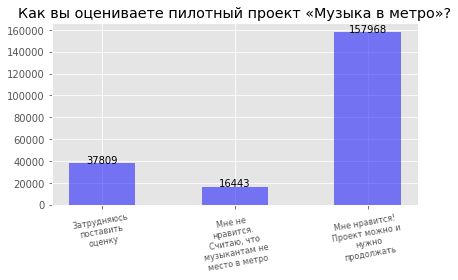

In [70]:
getAmount('a1', 'music', 3, 'Как вы оцениваете пилотный проект «Музыка в метро»?')

###### Большинство ожидаемо пользуется Wi-Fi в метро

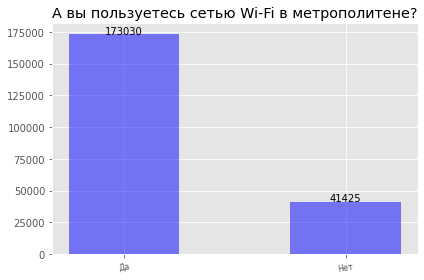

In [71]:
getAmount('a1', 'wifi', 3, 'А вы пользуетесь сетью Wi-Fi в метрополитене?')

###### Главные цели, с которыми люди пользуются Wi-Fi в метро - общение в соцсетях и чтение новостей

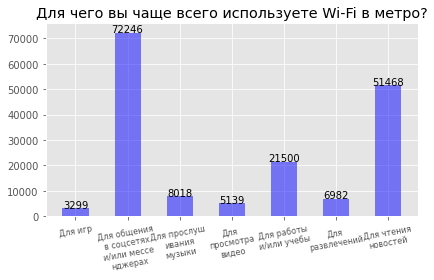

In [74]:
getAmount('a3', 'wifi', 7, 'Для чего вы чаще всего используете Wi-Fi в метро?')

###### Многим не нравится большое количество звуковых оповещений в метро

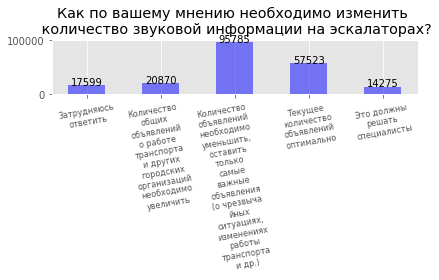

In [75]:
getAmount('a1', 'obyavlenia', 7, 'Как необходимо изменить \n количество звуковой информации на эскалаторах?')

###### Предпочитаемое наименование линий метро

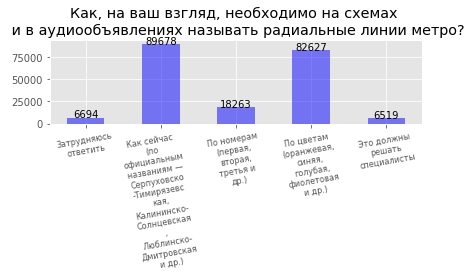

In [76]:
getAmount('a1', 'stations', 7, 'Как необходимо на схемах \n и в аудиообъявлениях называть радиальные линии метро?')

###### Примерный портрет человека, ответившего на все исследуемые вопросы "Активного гражданина" про метро

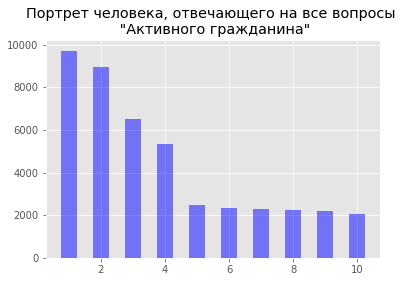

In [112]:
cur.execute('''SELECT count(*), stations.a1, obyavlenia.a1, music.a1, wifi.a1, wifi.a3
                FROM wifi
                JOIN stations ON stations.user=wifi.user
                JOIN obyavlenia ON obyavlenia.user=wifi.user
                JOIN music ON music.user=wifi.user
                GROUP BY stations.a1, obyavlenia.a1, music.a1, wifi.a1, wifi.a1
                ORDER BY count(*) DESC
            ''')

X = list(range(1, 11))
Y = []
res = cur.fetchall()
for element in res[:10]:
    Y.append(element[0])

with plt.style.context('ggplot'):
    plt.tight_layout()
    plt.xticks(rotation=0, ha='center')
    plt.title('Портрет человека, отвечающего на все вопросы \n "Активного гражданина"' )
    plt.bar(X, Y, 0.5, alpha=0.5, color='b')
    plt.show()

#### Топ портретов:
###### 1: называть метро по цветам; количество объявлений необходимо уменьшить; музыка в метро нравится; пользуются wi-fi для общения в соцсетях и/или мессенджерах
###### 2: оставить официальные названия (Серпуховско-Тимирязевская и др.); количество объявлений необходимо уменьшить; музыка в метро нравится; пользуются wi-fi для чтения новостей
###### 3: оставить официальные названия (Серпуховско-Тимирязевская и др.); количество объявлений оптимально; музыка в метро нравится; пользуются wi-fi для чтения новостей
###### 4: называть метро по цветам; количество объявлений оптимально; музыка в метро нравится; пользуются wi-fi для общения в соцсетях и/или мессенджерах
###### 5: оставить официальные названия; количество объявлений необходимо уменьшить; музыка в метро нравится; не пользуются wi-fi
###### 6: оставить официальные названия; количество объявлений необходимо увеличить; музыка в метро нравится; пользуются wi-fi для работы или учебы
###### 7: называть метро по номерам; количество объявлений необходимо уменьшить; музыка в метро нравится; пользуются wi-fi для работы или учебы
###### 8: оставить официальные названия; количество объявлений необходимо уменьшить; музыку не оценивают; пользуются wi-fi для игр
###### 9: называть метро по цветам; количество объявлений необходимо уменьшить; музыку не оценивают; пользуются wi-fi для чтения новостей
###### 10: называть метро по цветам; количество объявлений необходимо уменьшить; музыка в метро нравится; не пользуются wi-fi

###### --------------------------------------------

In [120]:
pprint(res[:20])

[(9723,
  'По цветам (оранжевая, синяя, голубая, фиолетовая и др.)',
  'Количество объявлений необходимо уменьшить, оставить только самые важные '
  'объявления (о чрезвычайных ситуациях, изменениях работы транспорта и др.)',
  'Мне нравится! Проект можно и нужно продолжать',
  'Да',
  'Для общения в соцсетях и/или мессенджерах'),
 (8980,
  'Как сейчас (по официальным названиям — Серпуховско-Тимирязевская, '
  'Калининско-Солнцевская, Люблинско-Дмитровская и др.)',
  'Количество объявлений необходимо уменьшить, оставить только самые важные '
  'объявления (о чрезвычайных ситуациях, изменениях работы транспорта и др.)',
  'Мне нравится! Проект можно и нужно продолжать',
  'Да',
  'Для чтения новостей'),
 (6507,
  'Как сейчас (по официальным названиям — Серпуховско-Тимирязевская, '
  'Калининско-Солнцевская, Люблинско-Дмитровская и др.)',
  'Текущее количество объявлений оптимально',
  'Мне нравится! Проект можно и нужно продолжать',
  'Да',
  'Для чтения новостей'),
 (5358,
  'По цветам